In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle
import copy
from collections import Counter
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs




drive.mount('/content/drive')

# importing Dataset and changing first column into categorical datatype
dataset = pd.read_csv("/content/drive/MyDrive/캡디1/crawling/찐최종/0606데이터정리.csv")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = dataset.drop('mbti',axis = 1)
data = data.drop('id',axis =1)
data = data.drop('secret',axis=1)
data = data.dropna()
data



,following,follower,post,tag_post,story,saturation,intensity,emoji
0,454,711,48,1,13,11.28247,47.98475,0.83333
1,26,23,120,1,3,20.72555,43.44227,0.94444
2,26,23,0,0,0,0.00000,0.00000,0.00000
3,577,359,27,13,3,27.93781,50.87691,1.83333
4,178,179,2,0,0,6.84354,86.27451,0.50000
...,...,...,...,...,...,...,...,...
841,132,19700,598,0,3,13.94365,41.41318,3.13514
842,1,450000,231,0,0,10.71951,52.33842,1.19444
843,177,59300,129,21,3,13.33144,35.20697,0.25000
844,213,1423,166,6,0,17.63811,37.06609,0.77778


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=42, affinity='euclidean', linkage='ward')
c = cluster.fit_predict(data)

In [ ]:
c

array([ 1, 20, 20,  3, 20,  3, 20,  3, 20,  0, 20, 20,  3,  3, 20,  1, 20,
        1,  3,  0, 20,  3,  0,  3, 20,  3,  0,  3,  9,  9, 20, 20, 30, 20,
       20,  1,  2, 28, 23,  1,  8, 28, 20,  3,  5,  0, 37, 20,  2, 17, 13,
       19, 11,  1, 20, 20, 13, 11, 41,  1, 10, 20, 18,  4, 20, 20,  1,  2,
        1,  3, 21, 19,  3, 20, 20,  8,  0,  3,  4,  2,  1, 20,  1,  0,  3,
        1,  0,  8, 10,  3,  3, 14,  3,  9,  3,  8, 14,  1,  3,  0, 20,  3,
        0,  3, 13, 41,  3,  5,  0, 20,  8,  8, 20, 20,  4, 20,  3,  3,  1,
        3,  0,  0, 14,  3,  1,  6,  1,  3,  3,  6,  3,  6, 20,  1, 15, 20,
       29, 41,  0, 16, 20,  9, 27,  3,  0, 40,  3,  3, 20,  3, 12,  3, 21,
        9, 20, 18, 12,  3,  0, 21,  1,  0, 18, 13,  1, 35, 10,  3,  3, 18,
       10, 18, 20, 20, 20, 20, 20,  1, 20,  0, 20, 20, 20,  3, 20, 31,  3,
        3, 20,  3, 20, 20, 20,  3, 20,  0, 18,  1, 20,  1, 20,  3, 20,  0,
        3, 20, 20, 20, 20, 20,  3,  3,  3,  3, 20,  3, 18,  3, 20,  3,  1,
        3,  3,  1,  0, 20

42개의 클러스터 => 8개의 그룹

42 (36%)1: 307명 ->20                    
43(32%)2: 273명 ->3 \
44(11%)3: 90명  ->1 \
45(7%)4: 55명  ->0 \
46(2%)5: 18명  ->5,6\
47(8%)6: 69명  ->14, 18, 10, 12, 8, 13, 19, 41, 2, 9, 15, 4 (follower >= 1731)\
48(2%)7: 21명  ->16, 11, 37, 28, 21, / 35, 30, 33, 25, 31, 7, 36 (follower >= 53500)\
49(2%)8: 13명  ->26, 24, 27, 22, 38, 29, 32, 40, 34, 17, 39, 23 (follower >= 200000)


In [ ]:
for i in range(len(c)):
  item = c[i]
  if item == 20:
    c[i]= 42
  elif item == 3:
    c[i] = 43
  elif item == 1:
    c[i] = 44
  elif item == 0:
    c[i] = 45
  elif item in [5,6]:
    c[i] = 46
  elif item in [14, 18, 10, 12, 8, 13, 19, 41, 2, 9, 15, 4]:
    c[i] = 47
  elif item in [16, 11, 37, 28, 21, 35, 30, 33, 25, 31, 7, 36]:
    c[i] = 48
  elif item in [26, 24, 27, 22, 38, 29, 32, 40, 34, 17, 39, 23]:
    c[i] = 49

In [ ]:
for i in range(len(c)):
  c[i] = c[i]-42

In [ ]:
c

array([2, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 0, 2, 0, 2, 1, 3, 0, 1,
       3, 1, 0, 1, 3, 1, 5, 5, 0, 0, 6, 0, 0, 2, 5, 6, 7, 2, 5, 6, 0, 1,
       4, 3, 6, 0, 5, 7, 5, 5, 6, 2, 0, 0, 5, 6, 5, 2, 5, 0, 5, 5, 0, 0,
       2, 5, 2, 1, 6, 5, 1, 0, 0, 5, 3, 1, 5, 5, 2, 0, 2, 3, 1, 2, 3, 5,
       5, 1, 1, 5, 1, 5, 1, 5, 5, 2, 1, 3, 0, 1, 3, 1, 5, 5, 1, 4, 3, 0,
       5, 5, 0, 0, 5, 0, 1, 1, 2, 1, 3, 3, 5, 1, 2, 4, 2, 1, 1, 4, 1, 4,
       0, 2, 5, 0, 7, 5, 3, 6, 0, 5, 7, 1, 3, 7, 1, 1, 0, 1, 5, 1, 6, 5,
       0, 5, 5, 1, 3, 6, 2, 3, 5, 5, 2, 6, 5, 1, 1, 5, 5, 5, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 0, 1, 0, 6, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 5, 2,
       0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 5, 1, 0, 1,
       2, 1, 1, 2, 3, 0, 3, 0, 1, 1, 0, 0, 2, 1, 1, 3, 4, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 5, 0, 1, 0, 1, 0, 5, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0,

In [ ]:
len(set(c))

8

In [ ]:
cluster.labels_

array([2, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 0, 2, 0, 2, 1, 3, 0, 1,
       3, 1, 0, 1, 3, 1, 5, 5, 0, 0, 6, 0, 0, 2, 5, 6, 7, 2, 5, 6, 0, 1,
       4, 3, 6, 0, 5, 7, 5, 5, 6, 2, 0, 0, 5, 6, 5, 2, 5, 0, 5, 5, 0, 0,
       2, 5, 2, 1, 6, 5, 1, 0, 0, 5, 3, 1, 5, 5, 2, 0, 2, 3, 1, 2, 3, 5,
       5, 1, 1, 5, 1, 5, 1, 5, 5, 2, 1, 3, 0, 1, 3, 1, 5, 5, 1, 4, 3, 0,
       5, 5, 0, 0, 5, 0, 1, 1, 2, 1, 3, 3, 5, 1, 2, 4, 2, 1, 1, 4, 1, 4,
       0, 2, 5, 0, 7, 5, 3, 6, 0, 5, 7, 1, 3, 7, 1, 1, 0, 1, 5, 1, 6, 5,
       0, 5, 5, 1, 3, 6, 2, 3, 5, 5, 2, 6, 5, 1, 1, 5, 5, 5, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 0, 1, 0, 6, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 5, 2,
       0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 5, 1, 0, 1,
       2, 1, 1, 2, 3, 0, 3, 0, 1, 1, 0, 0, 2, 1, 1, 3, 4, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 5, 0, 1, 0, 1, 0, 5, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0,

유형별 해당하는 사람 수 

In [ ]:
cl = cluster.labels_
unique, counts = np.unique(cl, return_counts=True)
dict(zip(unique, counts))


{0: 307, 1: 273, 2: 90, 3: 55, 4: 18, 5: 69, 6: 21, 7: 13}

지표별 평균

In [ ]:
sum(data[c == 0]['following'])/len(data[c==0])

119.54071661237785

In [ ]:
for i in range(8):
  d = data[c == i]
  print(i)
  print('following', sum(d['following'])/len(d))
  print('post', sum(d['post'])/len(d))
  print('tag_post', sum(d['tag_post'])/len(d))
  print('story', sum(d['story'])/len(d))
  print('saturation', sum(d['saturation'])/len(d))
  print('intensity', sum(d['intensity'])/len(d))
  print('emoji', sum(d['emoji'])/len(d))
  

0
following 119.54071661237785
post 36.732899022801305
tag_post 3.732899022801303
story 1.293159609120521
saturation 15.709864201954407
intensity 47.885962117263844
emoji 0.8977825732899016
1
following 360.1868131868132
post 138.93040293040292
tag_post 7.787545787545787
story 2.3772893772893773
saturation 16.560835494505493
intensity 46.833849340659356
emoji 1.1304235897435901
2
following 521.1
post 159.1
tag_post 9.766666666666667
story 3.466666666666667
saturation 14.866807777777778
intensity 46.92538555555555
emoji 1.103945555555556
3
following 451.27272727272725
post 254.6727272727273
tag_post 12.2
story 3.2363636363636363
saturation 14.013955090909086
intensity 51.08776927272729
emoji 1.5324021818181826
4
following 2742.6666666666665
post 1632.388888888889
tag_post 14.11111111111111
story 3.5
saturation 16.86719777777778
intensity 51.54468722222222
emoji 1.4468250000000002
5
following 788.6666666666666
post 681.5652173913044
tag_post 16.304347826086957
story 2.3333333333333335
sat

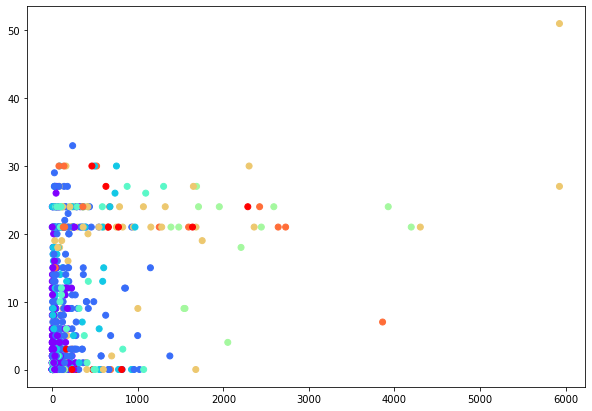

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['post'], data['tag_post'], c=cluster.labels_, cmap='rainbow')

In [ ]:
import seaborn as sns

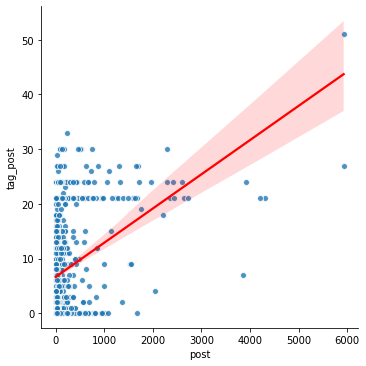

In [ ]:
sns.lmplot(x="post", y="tag_post", data=pd.DataFrame(data), line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)



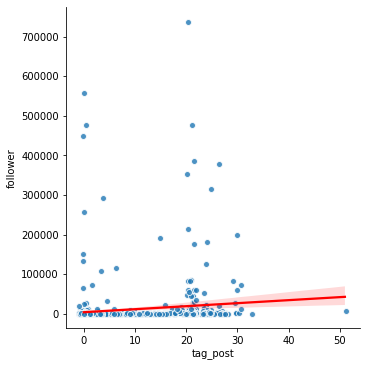

In [ ]:
sns.lmplot(x="tag_post", y="follower", data=pd.DataFrame(data), line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)



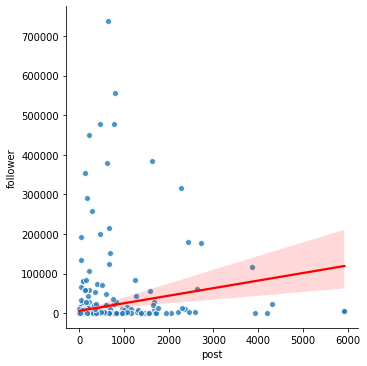

In [ ]:
sns.lmplot(x="post", y="follower", data=pd.DataFrame(data), line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)



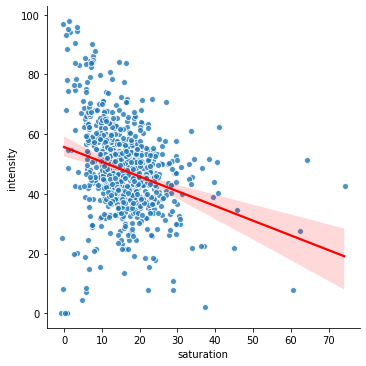

In [ ]:
sns.lmplot(x="saturation", y="intensity", data=pd.DataFrame(data), line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)


각 지표(7가지)에 대해서 8개의 그룹으로 표현\
X축 : follower, Y축 : following, post, tag_post, story, saturation, intensity, emoji

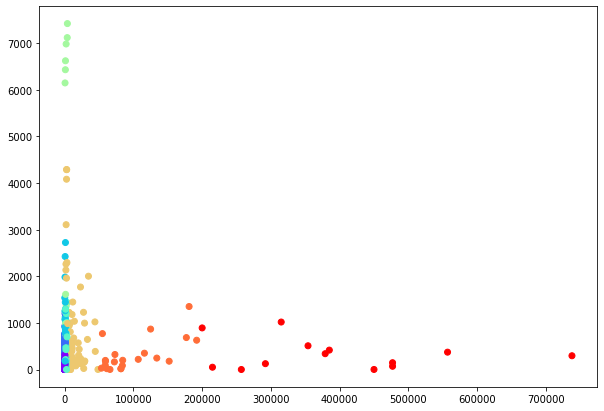

In [ ]:
# follower / following 
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['following'], c=cluster.labels_, cmap='rainbow')

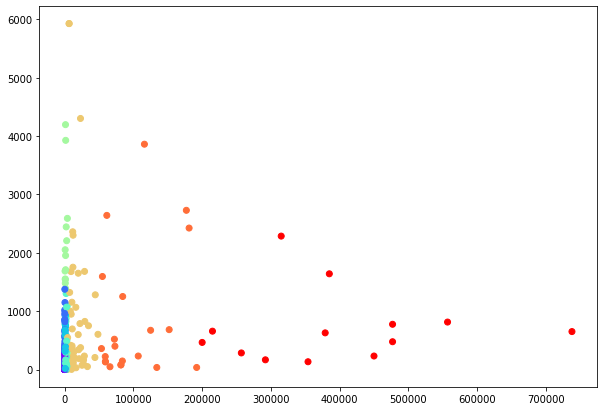

In [ ]:
# follower / post
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['post'], c=cluster.labels_, cmap='rainbow')

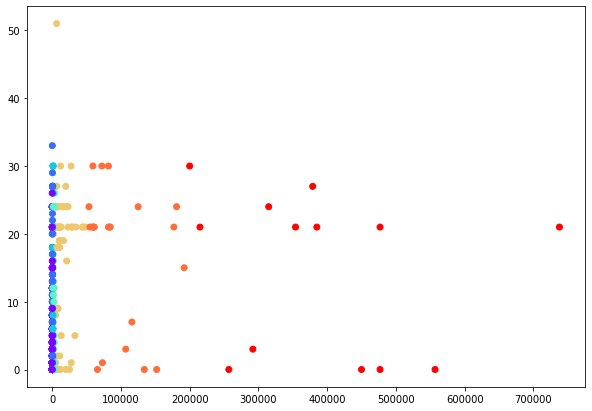

In [ ]:
# follower / tag_post
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['tag_post'], c=cluster.labels_, cmap='rainbow')

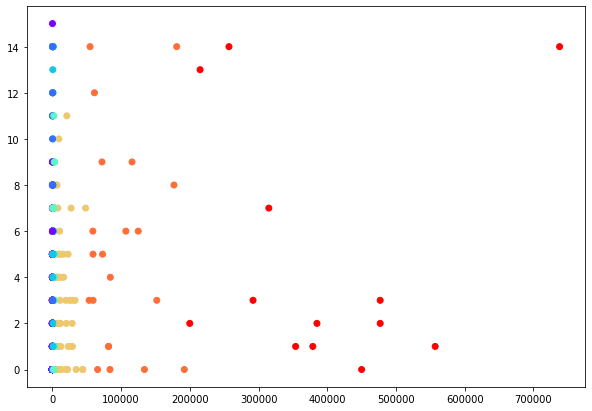

In [ ]:
# follower / story
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['story'], c=cluster.labels_, cmap='rainbow')

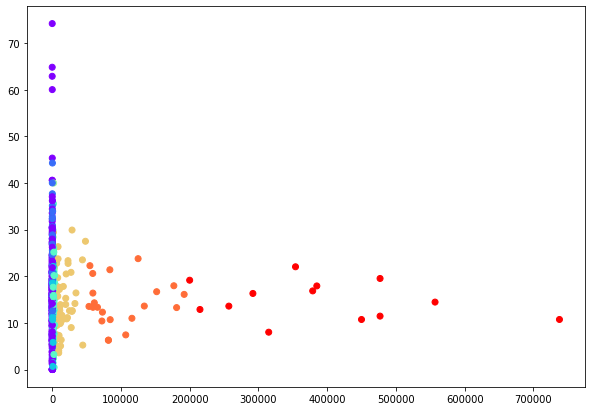

In [ ]:
# follower / saturation
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['saturation'], c=cluster.labels_, cmap='rainbow')

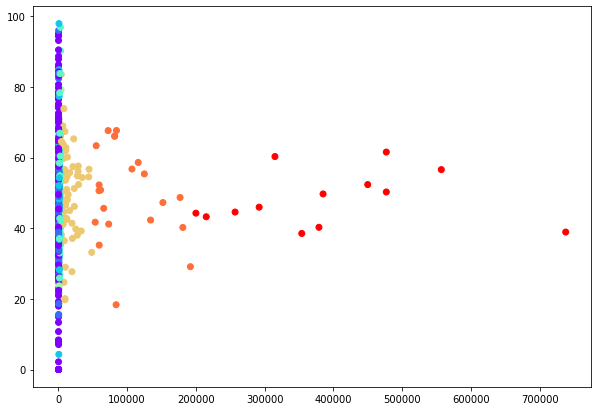

In [ ]:
# follower / intensity
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['intensity'], c=cluster.labels_, cmap='rainbow')

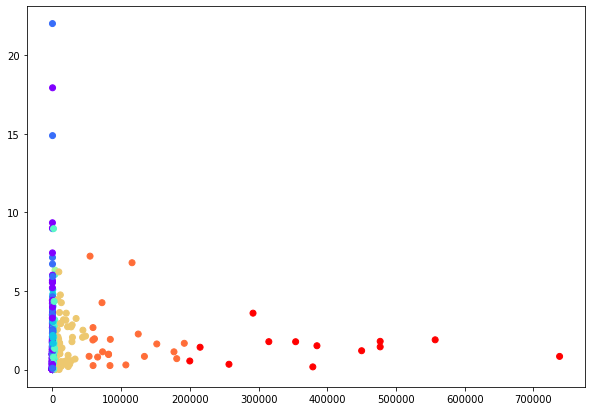

In [ ]:
# follower / emoji
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['emoji'], c=cluster.labels_, cmap='rainbow')